<div style="border: 1px solid thistle; padding: 5px 20px 10px 20px;">
    <h2><font color = "77658f" style=";">Feedback</font></h2><br>
    <font color = "77658f"> No need to name a variable adv_pth when you
        • Problem Statement: <b>Meet Minimum Requirement</b> <br>
        • Data Cleaning and EDA: <b>Meet Minimum Requirement</b><br>
        • Preprocessing and Modelling: <b>Meet Minimum Requirement</b><br>
        • Evaluation and Conceptual Understanding: <b>Meet Minimum Requirement</b><br>
        • Conclusion and Recommendation: <b>Meet Minimum Requirement</b><br>
        • Project Organisation: <b>Meet Minimum Requirement</b><br>
        • Visualisations: <b>Meet Minimum Requirement</b><br>
        • Python Syntax and Control Flow: <b>Meet Mininum Requirement</b><br>
    </font>
</div>

# Project 2: Ames Housing Data & Kaggle Challenge

## Problem Statement

A competition is being held on Kaggle to give participants the opportunity to practise the following skills:

- Refining models over time
- Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
- The use of Kaggle as a place to practice data science

## Executive Summary

This project aims to create a regression model based on the Ames Housing Dataset and predict the price of a house at sale. The final set of predictions will be uploaded to [Kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview).

### Contents:
- [Importing Libraries](#Importing-Libraries)
- [Loading & Cleaning The Data](#Loading-&-Cleaning-The-Data)
- [Feature Engineering & Selection](#Feature-Engineering-&-Selection)
- [Modelling](#Modelling)
- [Conclusion & Recommendations](#Conclusion-&-Recommendations)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

## Loading & Cleaning The Data

### Importing Data

In [2]:
# Importing Training Dataset

adv_pth = 'datasets/train.csv'
pd1 = pd.read_csv(adv_pth)


# Importing Test Dataset

adv_pth = 'datasets/test.csv'
pd2 = pd.read_csv(adv_pth)


> <font size = 3 color = red>No need to initiate the adv_pth variable when you are going to replace the value of adv_pth (the path string) after reading the csv. Just input the path string will do. </font>

In [3]:
# Cleaning column names to make them easier to work with

def column_rename(dataframe):
    dataframe.columns = [x.lower().replace(' ','_') for x in dataframe.columns]

In [4]:
column_rename(pd1)
column_rename(pd2)

In [5]:
# Adding source of data that will help in identifying its origin

pd1['source'] = 'pd1'

In [6]:
pd1.shape

(2051, 82)

In [7]:
# Adding source of data that will help in identifying its origin

pd2['source'] = 'pd2'

In [8]:
pd2.shape

(879, 81)

In [9]:
# Concatenate both training and test datasets into one consolidated dataframe

df = pd.concat([pd1, pd2])
df.shape

/Users/zhiyong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(2930, 82)

### Exploratory Data Analysis

#### Finding Out Missing and Zero Values

In [10]:
# To find out percentage of missing values

df.isnull().mean().sort_values(ascending=False)

pool_qc            0.995563
misc_feature       0.963823
alley              0.932423
fence              0.804778
fireplace_qu       0.485324
saleprice          0.300000
lot_frontage       0.167235
garage_yr_blt      0.054266
garage_qual        0.054266
garage_cond        0.054266
garage_finish      0.054266
garage_type        0.053584
bsmt_exposure      0.028328
bsmtfin_type_2     0.027645
bsmt_cond          0.027304
bsmt_qual          0.027304
bsmtfin_type_1     0.027304
mas_vnr_area       0.007850
mas_vnr_type       0.007850
bsmt_full_bath     0.000683
bsmt_half_bath     0.000683
electrical         0.000341
garage_area        0.000341
bsmtfin_sf_2       0.000341
bsmt_unf_sf        0.000341
total_bsmt_sf      0.000341
garage_cars        0.000341
bsmtfin_sf_1       0.000341
functional         0.000000
full_bath          0.000000
                     ...   
pool_area          0.000000
roof_matl          0.000000
roof_style         0.000000
sale_type          0.000000
screen_porch       0

In [11]:
# To find out percentage of zero values
zero_df = df.columns[(df == 0).any()]
num = (df[zero_df] == 0).sum()
round(num/2930, 2) 

2nd_flr_sf         0.57
3ssn_porch         0.99
bedroom_abvgr      0.00
bsmt_full_bath     0.58
bsmt_half_bath     0.94
bsmt_unf_sf        0.08
bsmtfin_sf_1       0.32
bsmtfin_sf_2       0.88
enclosed_porch     0.84
fireplaces         0.49
full_bath          0.00
garage_area        0.05
garage_cars        0.05
half_bath          0.63
kitchen_abvgr      0.00
low_qual_fin_sf    0.99
mas_vnr_area       0.60
misc_val           0.96
open_porch_sf      0.44
pool_area          1.00
screen_porch       0.91
total_bsmt_sf      0.03
wood_deck_sf       0.52
dtype: float64

In [12]:
# Drop Variables With High Percentages of Null Values (>90%) and Zero Values (>90%)
# Variables like bsmt_half_bath, 33ssn_porch and screen_porch will not be dropped first as they will be dealt with later in feature engineering

df.drop(["pool_qc", "misc_feature", "alley", "low_qual_fin_sf", 'misc_val', 'pool_area'], axis = 1, inplace = True)

#### Cleaning Up Basement Variables

In [13]:
col = ['bsmt_cond','bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_qual']
for i in col:
    Nan_rows = df[i].isnull()
    df.loc[Nan_rows, i] = 'None'
    print ('Null values of {} is: {:d}' .format(i, df[i].isnull().sum()))

Null values of bsmt_cond is: 0
Null values of bsmt_exposure is: 0
Null values of bsmtfin_type_1 is: 0
Null values of bsmtfin_type_2 is: 0
Null values of bsmt_qual is: 0


In [14]:
Unf_rows = (df['bsmtfin_type_1'] == 'Unf')
df.loc[Unf_rows,'bsmtfin_type_1'] = 'None'
print('Valuecount of BsmtFinType1: ', df['bsmtfin_type_1'].value_counts())

Unf_rows = (df['bsmtfin_type_2'] == 'Unf')
df.loc[Unf_rows,'bsmtfin_type_2'] = 'None'
print('Valuecount of BsmtFinType2: ', df['bsmtfin_type_2'].value_counts())

Valuecount of BsmtFinType1:  None    931
GLQ     859
ALQ     429
Rec     288
BLQ     269
LwQ     154
Name: bsmtfin_type_1, dtype: int64
Valuecount of BsmtFinType2:  None    2580
Rec      106
LwQ       89
BLQ       68
ALQ       53
GLQ       34
Name: bsmtfin_type_2, dtype: int64


In [15]:
zero_df = (df['bsmt_unf_sf'] == 0)
df.loc[zero_df, ].groupby('bsmt_cond').bsmt_unf_sf.count()
print('Zero Values for BsmtUnfSF Before: ', df.loc[zero_df,'bsmt_unf_sf'].count())

zero_df = ((df['bsmt_unf_sf'] == 0) & (df['bsmt_cond'] != 'None'))
df.loc[zero_df,'bsmt_unf_sf'] = df['bsmt_unf_sf'].median()
print('Zero Values for BsmtUnfSF After: ', df.loc[zero_df,'bsmt_unf_sf'].count())

Zero Values for BsmtUnfSF Before:  244
Zero Values for BsmtUnfSF After:  165


#### Cleaning Up Garage Variables

In [16]:
null_g = df['garage_cond'].isnull()
df.loc[null_g, ['garage_cond','garage_finish','garage_qual','garage_type']] = 'None'
df.loc[null_g, ['garage_area','garage_cars','garage_yr_blt']] = 0

#### Cleaning Up Fireplace Variable

In [17]:
null_f = df['fireplace_qu'].isnull()
df.loc[null_f, 'fireplace_qu'] = 'None'

#### Cleaning Up Fence Variable

In [18]:
df['fence'].fillna('None', inplace=True)
print ('Null values of Fence: ', df['fence'].isnull().sum())


Null values of Fence:  0


#### Cleaning Up LotFrontage Variable

In [19]:
df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)
print ('Null values of LotFrontage: ', df['lot_frontage'].isnull().sum())

Null values of LotFrontage:  0


#### Cleaning Up Masonry Veneer Variables

In [20]:
null_m = df['mas_vnr_type'].isnull()
df.loc[null_m, 'mas_vnr_area'] = 0
df.loc[null_m, 'mas_vnr_type'] = 'None'

null_m = (df['mas_vnr_area'] == 0)
df.loc[null_m, 'mas_vnr_type'] = 'None'

null_m = (df['mas_vnr_type'] == 'None')
df.loc[null_m, 'mas_vnr_area'] = 0

## Feature Engineering & Selection

### Consolidating Related Variables

#### Cleaning Up Porch Variables

In [21]:
df['porch'] = df['open_porch_sf'] + df['enclosed_porch'] + df ['3ssn_porch'] + df ['screen_porch']
df['porch'] = df['porch'].astype(bool).astype(int)

df['porch'].value_counts()

1    2055
0     875
Name: porch, dtype: int64

#### Cleaning Up Bath Variables

In [22]:
df['full_bath'] = df['full_bath'] + df['bsmt_full_bath']
df['half_bath'] = df['half_bath'] + df['bsmt_half_bath']

In [23]:
drop_col = ['bsmt_full_bath','bsmt_half_bath', '3ssn_porch', 'enclosed_porch', 'open_porch_sf','screen_porch']
df.drop(drop_col, axis=1, inplace=True)
df.shape

(2930, 71)

#### Check for Remaining Null Values

In [24]:
# Check for null values

null_df = df.columns[df.isnull().any()]
num = df[null_df].isnull().sum()
num

bsmt_unf_sf        1
bsmtfin_sf_1       1
bsmtfin_sf_2       1
electrical         1
full_bath          2
half_bath          2
saleprice        879
total_bsmt_sf      1
dtype: int64

#### Data-Cleaning of Null Values

In [25]:
# Filling Up median and mode values for numeric and non-numeric variables

cont_col = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf']
cat_col = ['electrical', 'full_bath','half_bath']
for i in cont_col:
    df[i].fillna(df[i].median(), inplace=True)
    print('Null values left for {} is: {:d}'.format(i, df[i].isnull().sum()))
    
for j in cat_col:
    df[j].fillna(df[j].mode()[0], inplace=True)
    print('Null values left for {} is: {:d}'.format(j, df[j].isnull().sum()))

Null values left for bsmtfin_sf_1 is: 0
Null values left for bsmtfin_sf_2 is: 0
Null values left for bsmt_unf_sf is: 0
Null values left for total_bsmt_sf is: 0
Null values left for electrical is: 0
Null values left for full_bath is: 0
Null values left for half_bath is: 0


<Figure size 432x288 with 0 Axes>

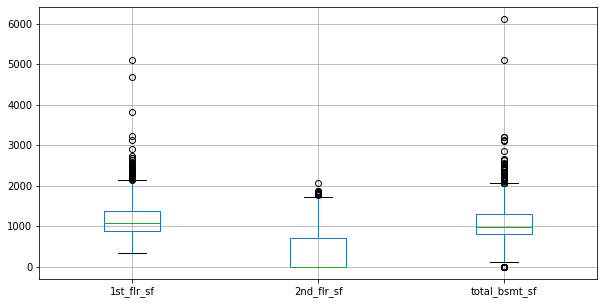

In [26]:
# Boxplot of related floor square feet variables

plt.figure(1)
plt.figure(figsize=(10,5))
df[['1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf']].boxplot()

<Figure size 432x288 with 0 Axes>

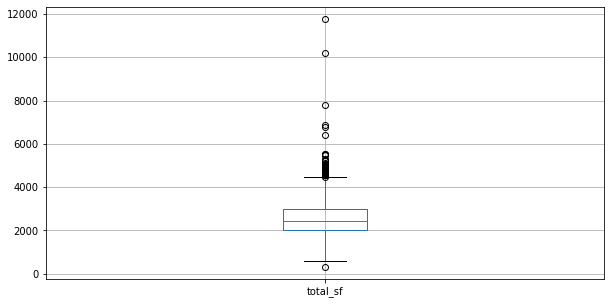

In [27]:
# Creating a new 'total_sf' variable - boxplot

df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf'] + df['total_bsmt_sf']
plt.figure(1)
plt.figure(figsize=(10,5))
df[['total_sf']].boxplot()

In [28]:
# Creating a new 'total_rooms' variables

df['total_rooms'] = df['bedroom_abvgr'] + df['totrms_abvgrd']

In [29]:
# Creating two new variables that account for difference in years for remodelling and its construction from the time it is sold

df['year_blt_age'] = df['yr_sold'] - df['year_built']
df['remod_age'] = df['yr_sold'] - df['year_remod/add']
df.shape

(2930, 75)

#### Dropping Feature-Engineered Columns

In [30]:
# Drop feature-engineered columns

col_fe = ['1st_flr_sf','2nd_flr_sf','bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf','bedroom_abvgr','totrms_abvgrd']
df.drop(col_fe, axis=1, inplace=True)
print('Total Features after removing engineered features: ', (df.shape))

Total Features after removing engineered features:  (2930, 67)


In [31]:
# Drop feature-engineered columns

df.drop(['year_built','year_remod/add'], axis=1, inplace=True)

#### Identifying Significant Numerical and Categorical Features

In [32]:
# Identifying numerical and categorical features

num_feat = df.dtypes[df.dtypes != 'object'].index
print('Total of numeric features: ', len(num_feat))
cat_feat = df.dtypes[df.dtypes == 'object'].index
print('Total of categorical features: ', len(cat_feat))

Total of numeric features:  25
Total of categorical features:  40


#### A More In-Depth Look at Numeric Variables

In [33]:
#Find correlation for numeric variables

target = 'saleprice'

corr = df.corr()
corr_abs = corr.abs()

nr_num_cols = len(num_feat)

ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]
print(ser_corr)

saleprice        1.000000
overall_qual     0.800207
total_sf         0.783006
gr_liv_area      0.697038
garage_area      0.649897
garage_cars      0.647781
full_bath        0.587228
year_blt_age     0.571881
remod_age        0.551716
mas_vnr_area     0.503529
fireplaces       0.471093
total_rooms      0.410292
wood_deck_sf     0.326490
lot_frontage     0.325129
porch            0.312311
lot_area         0.296566
garage_yr_blt    0.258645
pid              0.255052
half_bath        0.235999
kitchen_abvgr    0.125444
overall_cond     0.097019
ms_subclass      0.087335
id               0.051398
mo_sold          0.032735
yr_sold          0.015203
Name: saleprice, dtype: float64


In [34]:
# Drop columns based on corr < 40% 

col_drop_corr = ['garage_yr_blt','lot_frontage','wood_deck_sf','porch','lot_area',
                 'half_bath','kitchen_abvgr','ms_subclass',
                 'overall_cond', 'mo_sold', 'yr_sold', 'pid']
df.drop(col_drop_corr, axis=1, inplace=True)
print('Total features: ', df.shape)

Total features:  (2930, 53)


#### A More In-Depth Look at Categorical Variables

In [35]:
# Highest value Frequency percentage in categorical variables 
for i in list(cat_feat):
    pct = df[i].value_counts()[0] / 2930
    print('Highest value Percentage of {}: {:3f}'.format(i, pct))

Highest value Percentage of bldg_type: 0.827645
Highest value Percentage of bsmt_cond: 0.892833
Highest value Percentage of bsmt_exposure: 0.650512
Highest value Percentage of bsmt_qual: 0.437884
Highest value Percentage of bsmtfin_type_1: 0.317747
Highest value Percentage of bsmtfin_type_2: 0.880546
Highest value Percentage of central_air: 0.933106
Highest value Percentage of condition_1: 0.860751
Highest value Percentage of condition_2: 0.989761
Highest value Percentage of electrical: 0.915700
Highest value Percentage of exter_cond: 0.869966
Highest value Percentage of exter_qual: 0.613993
Highest value Percentage of exterior_1st: 0.350171
Highest value Percentage of exterior_2nd: 0.346416
Highest value Percentage of fence: 0.804778
Highest value Percentage of fireplace_qu: 0.485324
Highest value Percentage of foundation: 0.447099
Highest value Percentage of functional: 0.931058
Highest value Percentage of garage_cond: 0.909556
Highest value Percentage of garage_finish: 0.420137
High

In [36]:
# Drop columns which have frequency of value more than 80% of all values 

col_drop = ['bldg_type','bsmt_cond','bsmtfin_type_2','central_air','condition_1','condition_2','electrical','exter_cond',
           'fence', 'functional','garage_cond','garage_qual','heating','land_contour','land_slope','paved_drive','roof_matl',
           'sale_type','street','utilities']
df.drop(col_drop, axis=1, inplace=True)
print('Total features after dropping categorical features: ', df.shape)

Total features after dropping categorical features:  (2930, 33)


In [37]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
cat_cols

Index(['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape', 'mas_vnr_type', 'ms_zoning',
       'neighborhood', 'roof_style', 'source'],
      dtype='object')

In [38]:
# Integer Conversions (Label Encoder)

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

cat_cols = ['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape', 'mas_vnr_type', 'ms_zoning',
       'neighborhood', 'roof_style'] 
for i in cat_cols:
     df[i] = lc.fit_transform(df[i])
    
df.shape

(2930, 33)

In [39]:
# One-hot Encoding

col_encod = ['bsmt_exposure', 'bsmt_qual', 'bsmtfin_type_1', 'exter_qual',
       'exterior_1st', 'exterior_2nd', 'fireplace_qu', 'foundation',
       'garage_finish', 'garage_type', 'heating_qc', 'house_style',
       'kitchen_qual', 'lot_config', 'lot_shape', 'mas_vnr_type', 'ms_zoning',
       'neighborhood', 'roof_style']
df = pd.get_dummies(df, columns=col_encod)

df.shape

(2930, 164)

## Modelling

### Preparing Datasets for Modelling

In [40]:
# Splitting up datasets back into training and test datasets

pd1 = df.loc[df['source'] == 'pd1']
pd2 = df.loc[df['source'] == 'pd2']
print(pd1.shape, pd2.shape)

(2051, 164) (879, 164)


In [41]:
# Removing 'source' column that helped in identifying data origin

pd1.drop(['source'], axis = 1, inplace=True)
pd2.drop(['source'], axis = 1, inplace=True)
print(pd1.shape, pd2.shape)
pd2.columns

(2051, 163) (879, 163)


/Users/zhiyong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['fireplaces', 'full_bath', 'garage_area', 'garage_cars', 'gr_liv_area',
       'id', 'mas_vnr_area', 'overall_qual', 'saleprice', 'total_sf',
       ...
       'neighborhood_24', 'neighborhood_25', 'neighborhood_26',
       'neighborhood_27', 'roof_style_0', 'roof_style_1', 'roof_style_2',
       'roof_style_3', 'roof_style_4', 'roof_style_5'],
      dtype='object', length=163)

In [42]:
# Train-Test-Split of Training Dataset

pred_col = [x for x in pd1.columns if x not in ['saleprice', 'id']]
X = pd1[pred_col]
y = pd1['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1538, 161), (513, 161), (1538,), (513,))

### Model Fitting & Scoring

#### Model 1

In [43]:
# Cross-Val Score of Model

lr = LinearRegression()
print(cross_val_score(lr, X_train, y_train, cv=10))
print(cross_val_score(lr, X_train, y_train, cv=10).mean())


[0.89873191 0.86794846 0.79596058 0.86565331 0.83059115 0.88218737
 0.91159649 0.78888945 0.64647816 0.86058927]
0.8348626149466174


In [44]:
# Model Fit & Score

lr.fit(X_train, y_train)

score = lr.score(X_test,y_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.876942


In [45]:
# Predicting Test-Values

pred_col = [x for x in pd2.columns if x not in ['saleprice', 'id']]
X = pd2[pred_col]
predictions = lr.predict(X)

In [46]:
### OLS on Training Set

import statsmodels.api as sm

x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
results = model.fit()

/Users/zhiyong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     79.18
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:21:19   Log-Likelihood:                -17880.
No. Observations:                1538   AIC:                         3.603e+04
Df Residuals:                    1402   BIC:                         3.676e+04
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3448.8851   3810.487      0.905      0.366   -4025.985    1.09e+04
fireplaces        7579.0887   3044.642      2.489      0.013    1606.543    1.36e+04
full_bath         5886.4185   1466.120      4.015      0.000    3010.393    8762.444
garage_area         25.9736      9.021      2.879      0.004       8.277      43.670
garage_cars       5284.4247   2719.502      1.943      0.052     -50.307    1.06e+04
gr_liv_area         32.6044      6.908      4.720      0.000      19.054      46.155
mas_vnr_area        19.4529      7.083      2.747      0.006       5.559      33.346
overall_qual      8190.0010   1120.745      7.308      0.000    5991.482    1.04e+04
total_sf            -1.2577      3.712     -0.339      0.735      -8.540       6.025
total_rooms       1656.9228    656.375      2.524      0.012     369.341    2944.505
year_blt_age       -70.2001     72.668     -0.966      0.334    -212.750      72.350
remod_age         -117.1723     59.174     -1.980      0.048    -233.252      -1.093
bsmt_exposure_0   1144.3028   3868.945      0.296      0.767   -6445.241    8733.847
bsmt_exposure_1   2.093e+04   4262.855      4.911      0.000    1.26e+04    2.93e+04
bsmt_exposure_2  -7217.2303   4130.555     -1.747      0.081   -1.53e+04     885.505
bsmt_exposure_3  -6439.1915   3653.877     -1.762      0.078   -1.36e+04     728.465
bsmt_exposure_4  -4972.3341   1.35e+04     -0.369      0.712   -3.14e+04    2.14e+04
bsmt_qual_0       1.687e+04   7326.014      2.302      0.021    2494.134    3.12e+04
bsmt_qual_1      -1234.5288   7501.503     -0.165      0.869   -1.59e+04    1.35e+04
bsmt_qual_2      -1265.7994   6553.315     -0.193      0.847   -1.41e+04    1.16e+04
bsmt_qual_3      -7726.1676   1.65e+04     -0.468      0.640   -4.01e+04    2.47e+04
bsmt_qual_4      -2662.2130    2.8e+04     -0.095      0.924   -5.76e+04    5.23e+04
bsmt_qual_5       -527.6693   6417.860     -0.082      0.934   -1.31e+04    1.21e+04
bsmtfin_type_1_0  3865.4938   2118.853      1.824      0.068    -290.969    8021.957
bsmtfin_type_1_1  2717.1023   2363.984      1.149      0.251   -1920.225    7354.429
bsmtfin_type_1_2  3193.5064   2053.571      1.555      0.120    -834.897    7221.910
bsmtfin_type_1_3 -1536.9306   3056.209     -0.503      0.615   -7532.165    4458.304
bsmtfin_type_1_4 -7180.2968   1804.348     -3.979      0.000   -1.07e+04   -3640.785
bsmtfin_type_1_5  2390.0100   2457.484      0.973      0.331   -2430.731    7210.751
exter_qual_0      3.092e+04   5121.418      6.037      0.000    2.09e+04     4.1e+04
exter_qual_1     -2.053e+04   6380.011     -3.218      0.001    -3.3e+04   -8015.257
exter_qual_2      -824.5283   2989.240     -0.276      0.783   -6688.393    5039.337
exter_qual_3     -6112.0119   2990.141     -2.044      0.041    -1.2e+04    -246.379
exterior_1st_0    -897.

#### Model 2

In [48]:
# Create new list of predictors based on OLS summary above (those with prob > 0.05 are excluded)

pred_col_1 = ["fireplaces", "full_bath","garage_area", "gr_liv_area", "mas_vnr_area","overall_qual", "total_rooms",
            "remod_age", "bsmt_exposure_1", "bsmt_qual_0", "bsmtfin_type_1_4", "exter_qual_0", "exter_qual_1",
              "exter_qual_3", "garage_finish_1", "garage_finish_2", "garage_type_0", "garage_type_1",
              "garage_type_3", "garage_type_6", "house_style_0", "house_style_3","house_style_5",
              "house_style_6", "house_style_7", "kitchen_qual_0", "kitchen_qual_1", 
              "kitchen_qual_4", "lot_config_1", "lot_config_2", "lot_shape_0",
              "lot_shape_1", "lot_shape_2", "lot_shape_3", "mas_vnr_type_3", "neighborhood_0",
              "neighborhood_6", "neighborhood_7", "neighborhood_8", "neighborhood_10" ,"neighborhood_13",
            "neighborhood_15", "neighborhood_18", "neighborhood_19", "neighborhood_21", "neighborhood_22",
              "neighborhood_23","neighborhood_25", "roof_style_4"]

X1 = pd1[pred_col_1]
y1 = pd1['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X1)

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,random_state= 42)
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape


((1538, 49), (513, 49), (1538,), (513,))

In [49]:
# Cross-Val Score of Model

lr_1 = LinearRegression()
print(cross_val_score(lr_1, X1_train, y1_train, cv=10))
print(cross_val_score(lr_1, X1_train, y1_train, cv=10).mean())


[0.90494574 0.87179221 0.81518366 0.85804842 0.85430104 0.88940172
 0.90619123 0.79399661 0.67881584 0.87205069]
0.8444727160368346


In [50]:
# Model Fit & Score

lr_1.fit(X1_train, y1_train)

score = lr_1.score(X1_test,y1_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.868150


In [51]:
# Predicting Test-Values

X = pd2[pred_col_1]
predictions = lr_1.predict(X)

In [52]:
# OLS on Training Set

x1_train = sm.add_constant(X1_train)
new_model = sm.OLS(y1_train, x1_train)
results_1 = new_model.fit()

/Users/zhiyong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:21:20   Log-Likelihood:                -17969.
No. Observations:                1538   AIC:                         3.603e+04
Df Residuals:                    1490   BIC:                         3.629e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6877.8814   6829.969      1.007      0.314   -6519.495    2.03e+04
fireplaces        9348.6776   1493.312      6.260      0.000    6419.460    1.23e+04
full_bath         6763.2934   1388.620      4.871      0.000    4039.436    9487.151
garage_area         48.9995      5.844      8.384      0.000      37.535      60.464
gr_liv_area         26.6254      3.644      7.308      0.000      19.478      33.772
mas_vnr_area        22.4736      6.929      3.243      0.001       8.881      36.066
overall_qual      9477.9716   1002.865      9.451      0.000    7510.795    1.14e+04
total_rooms       2428.5668    623.808      3.893      0.000    1204.931    3652.202
remod_age         -273.8034     54.491     -5.025      0.000    -380.692    -166.915
bsmt_exposure_1   2.176e+04   2909.945      7.477      0.000     1.6e+04    2.75e+04
bsmt_qual_0       2.165e+04   3740.604      5.788      0.000    1.43e+04     2.9e+04
bsmtfin_type_1_4  -1.16e+04   1895.093     -6.119      0.000   -1.53e+04   -7878.468
exter_qual_0      2.966e+04   5538.324      5.356      0.000    1.88e+04    4.05e+04
exter_qual_1     -2.621e+04   7838.721     -3.343      0.001   -4.16e+04   -1.08e+04
exter_qual_3      -1.17e+04   2757.311     -4.242      0.000   -1.71e+04   -6287.645
garage_finish_1   5729.3995   2228.416      2.571      0.010    1358.234    1.01e+04
garage_finish_2  -3512.7476   1873.131     -1.875      0.061   -7187.001     161.506
garage_type_0    -1.853e+04   8136.468     -2.277      0.023   -3.45e+04   -2568.229
garage_type_1     1.143e+04   2226.073      5.134      0.000    7061.831    1.58e+04
garage_type_3     1.949e+04   4064.094      4.796      0.000    1.15e+04    2.75e+04
garage_type_6     5729.3995   2228.416      2.571      0.010    1358.234    1.01e+04
house_style_0    -6710.8704   2961.610     -2.266      0.024   -1.25e+04    -901.502
house_style_3     4.494e+04   1.82e+04      2.467      0.014    9213.285    8.07e+04
house_style_5    -8599.3496   2282.652     -3.767      0.000   -1.31e+04   -4121.796
house_style_6    -6339.9052   5050.731     -1.255      0.210   -1.62e+04    3567.393
house_style_7    -9252.3837   4052.921     -2.283      0.023   -1.72e+04   -1302.346
kitchen_qual_0     2.51e+04   4171.604      6.017      0.000    1.69e+04    3.33e+04
kitchen_qual_1   -1.059e+04   5722.170     -1.851      0.064   -2.18e+04     633.209
kitchen_qual_4   -6207.6660   2376.820     -2.612      0.009   -1.09e+04   -1545.398
lot_config_1      9981.9455   3449.879      2.893      0.004    3214.809    1.67e+04
lot_config_2     -1.123e+04   4484.813     -2.503      0.012      -2e+04   -2428.691
lot_shape_0       1.511e+04   3194.118      4.731      0.000    8845.458    2.14e+04
lot_shape_1       2.635e+04   4963.504      5.310      0.000    1.66e+04    3.61e+04
lot_shape_2      -4.899

#### Model 3

In [54]:
# Create new list of predictors based on OLS summary above (those with prob > 0.05 are excluded)

pred_col_2 = ["fireplaces", "full_bath","garage_area", "gr_liv_area", "mas_vnr_area","overall_qual", "total_rooms",
            "remod_age", "bsmt_exposure_1", "bsmt_qual_0", "bsmtfin_type_1_4", "exter_qual_0", "exter_qual_1",
              "exter_qual_3", "garage_finish_1", "garage_type_0", "garage_type_1",
              "garage_type_3", "garage_type_6", "house_style_0", "house_style_3","house_style_5",
              "house_style_7", "kitchen_qual_0", 
              "kitchen_qual_4", "lot_config_1", "lot_config_2", "lot_shape_0",
              "lot_shape_1", "lot_shape_2", "lot_shape_3", "mas_vnr_type_3",
              "neighborhood_6", "neighborhood_7", "neighborhood_10" ,"neighborhood_13",
              "neighborhood_18", "neighborhood_19","neighborhood_25", "roof_style_4"]

X2 = pd1[pred_col_2]
y2 = pd1['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X2)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state= 42)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape


((1538, 40), (513, 40), (1538,), (513,))

In [55]:
# Cross-Val Score of Model

lr_2 = LinearRegression()
print(cross_val_score(lr_2, X2_train, y2_train, cv=10))
print(cross_val_score(lr_2, X2_train, y2_train, cv=10).mean())


[0.90428903 0.87375335 0.81364126 0.85783397 0.85454995 0.88951733
 0.90751213 0.79304356 0.67816958 0.87329203]
0.8445602189339138


In [56]:
# Model Fit & Score

lr_2.fit(X2_train, y2_train)

score = lr_2.score(X2_test,y2_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.869072


In [57]:
# Predicting Test-Values
X = pd2[pred_col_2]
predictions = lr_2.predict(X)

In [58]:
# OLS on Training Set

x2_train = sm.add_constant(X2_train)
new_model = sm.OLS(y2_train, x2_train)
results_2 = new_model.fit()

/Users/zhiyong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:21:20   Log-Likelihood:                -17976.
No. Observations:                1538   AIC:                         3.603e+04
Df Residuals:                    1499   BIC:                         3.624e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1801.0663   6617.609      0.272      0.786   -1.12e+04    1.48e+04
fireplaces        9130.5688   1478.071      6.177      0.000    6231.262     1.2e+04
full_bath         6667.7623   1363.717      4.889      0.000    3992.766    9342.759
garage_area         49.0143      5.722      8.566      0.000      37.790      60.238
gr_liv_area         27.1444      3.616      7.506      0.000      20.051      34.238
mas_vnr_area        24.3878      6.831      3.570      0.000      10.989      37.787
overall_qual      9951.2515    977.695     10.178      0.000    8033.455    1.19e+04
total_rooms       2340.4087    618.771      3.782      0.000    1126.660    3554.157
remod_age         -283.2912     52.447     -5.401      0.000    -386.169    -180.413
bsmt_exposure_1    2.11e+04   2888.863      7.303      0.000    1.54e+04    2.68e+04
bsmt_qual_0       2.248e+04   3715.336      6.049      0.000    1.52e+04    2.98e+04
bsmtfin_type_1_4 -1.145e+04   1838.574     -6.227      0.000   -1.51e+04   -7842.956
exter_qual_0      2.924e+04   5528.424      5.288      0.000    1.84e+04    4.01e+04
exter_qual_1     -2.858e+04   7579.976     -3.771      0.000   -4.35e+04   -1.37e+04
exter_qual_3     -1.167e+04   2699.572     -4.325      0.000    -1.7e+04   -6379.113
garage_finish_1   5475.1183   2206.536      2.481      0.013    1146.892    9803.345
garage_type_0    -1.798e+04   8117.351     -2.215      0.027   -3.39e+04   -2054.284
garage_type_1     1.069e+04   2098.799      5.095      0.000    6575.457    1.48e+04
garage_type_3     1.951e+04   3941.007      4.951      0.000    1.18e+04    2.72e+04
garage_type_6     5475.1183   2206.536      2.481      0.013    1146.892    9803.345
house_style_0    -5509.4669   2913.170     -1.891      0.059   -1.12e+04     204.855
house_style_3     4.316e+04   1.81e+04      2.384      0.017    7654.696    7.87e+04
house_style_5    -7980.0553   2210.813     -3.610      0.000   -1.23e+04   -3643.441
house_style_7    -8863.0780   4011.820     -2.209      0.027   -1.67e+04    -993.701
kitchen_qual_0     2.58e+04   4157.718      6.206      0.000    1.76e+04     3.4e+04
kitchen_qual_4   -4583.7754   2186.392     -2.097      0.036   -8872.487    -295.063
lot_config_1      9417.4786   3427.276      2.748      0.006    2694.712    1.61e+04
lot_config_2     -1.063e+04   4476.233     -2.375      0.018   -1.94e+04   -1852.206
lot_shape_0       1.395e+04   3154.374      4.423      0.000    7764.441    2.01e+04
lot_shape_1       2.532e+04   4952.883      5.112      0.000    1.56e+04     3.5e+04
lot_shape_2      -5.044e+04   9175.055     -5.497      0.000   -6.84e+04   -3.24e+04
lot_shape_3       1.297e+04   3128.136      4.145      0.000    6831.485    1.91e+04
mas_vnr_type_3    5773.7274   2282.904      2.529      0.012    1295.701    1.03e+04
neighborhood_6    2.459

#### Model 4

In [60]:
# Create new list of predictors based on OLS summary above (those with prob > 0.05 are excluded)

pred_col_3 = ["fireplaces", "full_bath","garage_area", "gr_liv_area", "mas_vnr_area","overall_qual", "total_rooms",
            "remod_age", "bsmt_exposure_1", "bsmt_qual_0", "bsmtfin_type_1_4", "exter_qual_0", "exter_qual_1",
              "exter_qual_3", "garage_finish_1", "garage_type_0", "garage_type_1",
              "garage_type_3", "garage_type_6", "house_style_3","house_style_5",
               "house_style_7", "kitchen_qual_0", 
              "kitchen_qual_4", "lot_config_1", "lot_config_2", "lot_shape_0",
              "lot_shape_1", "lot_shape_2", "lot_shape_3", "mas_vnr_type_3",
              "neighborhood_6", "neighborhood_7", "neighborhood_10" ,"neighborhood_13",
              "neighborhood_18", "neighborhood_19","neighborhood_25", "roof_style_4"]

X3 = pd1[pred_col_3]
y3 = pd1['saleprice']

scaler = StandardScaler()
scaler.fit_transform(X3)

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,random_state= 42)
X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape


((1538, 39), (513, 39), (1538,), (513,))

In [61]:
# Cross-Val Score of Model

lr_3 = LinearRegression()
print(cross_val_score(lr_3, X3_train, y3_train, cv=10))
print(cross_val_score(lr_3, X3_train, y3_train, cv=10).mean())

[0.90316339 0.87351708 0.81261064 0.856924   0.8537539  0.88946653
 0.90609239 0.79708227 0.68201228 0.87237955]
0.844700203543


In [62]:
# Model Fit & Score

lr_3.fit(X3_train, y3_train)

score = lr_3.score(X3_test,y3_test)
print ('Model Score: {:4f}'.format(score))

Model Score: 0.867409


In [63]:
# Predicting Test-Values
X = pd2[pred_col_3]
predictions = lr_3.predict(X)

In [64]:
# OLS on Training Set

x3_train = sm.add_constant(X3_train)
new_model = sm.OLS(y3_train, x3_train)
results_3 = new_model.fit()

/Users/zhiyong/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     267.3
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:21:20   Log-Likelihood:                -17978.
No. Observations:                1538   AIC:                         3.603e+04
Df Residuals:                    1500   BIC:                         3.623e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2324.1811   6617.503      0.351      0.725   -1.07e+04    1.53e+04
fireplaces        9281.1786   1477.191      6.283      0.000    6383.599    1.22e+04
full_bath         6900.3329   1359.327      5.076      0.000    4233.949    9566.717
garage_area         50.5076      5.672      8.905      0.000      39.381      61.634
gr_liv_area         25.4372      3.505      7.257      0.000      18.562      32.312
mas_vnr_area        24.6808      6.835      3.611      0.000      11.273      38.088
overall_qual      9909.6535    978.287     10.130      0.000    7990.698    1.18e+04
total_rooms       2302.1454    618.971      3.719      0.000    1088.005    3516.286
remod_age         -290.1479     52.367     -5.541      0.000    -392.868    -187.428
bsmt_exposure_1   2.137e+04   2887.812      7.399      0.000    1.57e+04     2.7e+04
bsmt_qual_0       2.253e+04   3718.420      6.059      0.000    1.52e+04    2.98e+04
bsmtfin_type_1_4 -1.147e+04   1840.105     -6.236      0.000   -1.51e+04   -7865.014
exter_qual_0      2.956e+04   5530.566      5.344      0.000    1.87e+04    4.04e+04
exter_qual_1      -2.86e+04   7586.480     -3.770      0.000   -4.35e+04   -1.37e+04
exter_qual_3     -1.163e+04   2701.773     -4.303      0.000   -1.69e+04   -6327.355
garage_finish_1   6022.4100   2189.356      2.751      0.006    1727.886    1.03e+04
garage_type_0     -1.66e+04   8091.792     -2.052      0.040   -3.25e+04    -732.066
garage_type_1      1.17e+04   2031.285      5.762      0.000    7719.148    1.57e+04
garage_type_3     2.023e+04   3926.179      5.152      0.000    1.25e+04    2.79e+04
garage_type_6     6022.4100   2189.356      2.751      0.006    1727.886    1.03e+04
house_style_3      4.78e+04    1.8e+04      2.663      0.008    1.26e+04     8.3e+04
house_style_5    -6473.4574   2064.071     -3.136      0.002   -1.05e+04   -2424.686
house_style_7    -8243.4833   4001.853     -2.060      0.040   -1.61e+04    -393.661
kitchen_qual_0    2.603e+04   4159.507      6.258      0.000    1.79e+04    3.42e+04
kitchen_qual_4   -4625.1474   2188.159     -2.114      0.035   -8917.324    -332.971
lot_config_1      9552.6602   3429.473      2.785      0.005    2825.589    1.63e+04
lot_config_2     -1.052e+04   4479.681     -2.348      0.019   -1.93e+04   -1732.961
lot_shape_0       1.394e+04   3157.076      4.416      0.000    7747.894    2.01e+04
lot_shape_1       2.534e+04   4957.128      5.111      0.000    1.56e+04    3.51e+04
lot_shape_2      -4.967e+04   9173.891     -5.414      0.000   -6.77e+04   -3.17e+04
lot_shape_3       1.272e+04   3127.985      4.065      0.000    6580.020    1.89e+04
mas_vnr_type_3    5467.6113   2279.114      2.399      0.017     997.022    9938.200
neighborhood_6     2.45e+04   4466.972      5.485      0.000    1.57e+04    3.33e+04
neighborhood_7   -1.354

In [66]:
# Convert predictions into CSV file for Kaggle upload

sub = pd.DataFrame()
sub['Id'] = pd2['id']
sub['SalePrice'] = predictions
sub.to_csv('house_price_predictions_.csv',index=False)

## Conclusion & Recommendations

The model has an adjusted R-squared value of 0.865, which means that it is able to explain 86.5% of the variance in the house price based on the list of predictors that have been specified in the summary. In particular, the list of predictors would include:

- the number of fireplaces;
- the number of basement and non-basement full bathrooms;
- the garage size, location and interior finish;
- the above-grade living area;
- the masonry veneer area and type;
- the overall material and finish of the house;
- the total number of rooms and bedrooms above grade;
- the difference in years for both the house's construction and re-modelling from the time it is sold;
- the basement exposure, height, and rating of finished area;
- the exterior quality;
- the house style;
- the kitchen quality;
- the lot shape and configuration;
- the roof style;
- the neighborhood.